In [1]:
!pip install scikit-learn scikit-image

In [2]:
##Import all needed libraries
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io

##The dataset is loaded to your GDrive so need to be mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Team Member Names:

Name 1: Sara Gamal Gerges

Name 2:Iman Ibrahim

# Lab2 Introduction
The PCA class in the sklearn.decomposition module is a machine learning algorithm that is commonly used for dimensionality reduction. It stands for Principal Component Analysis and it aims to find the most important patterns or structures in the data.

In the context of image processing, PCA can be used to reduce the dimensionality of an image by finding a smaller set of features that capture most of the variation in the original data. This is useful because images typically have a large number of pixels, which can make it difficult to analyze or visualize the data.

The PCA algorithm works by finding a new set of coordinates for the data that capture the most variance in the data. These coordinates are called principal components. The first principal component captures the most variance in the data, the second principal component captures the second most variance, and so on. By keeping only the first few principal components, we can reduce the dimensionality of the data while retaining most of the information.

(183, 275, 3)
(50325, 3)


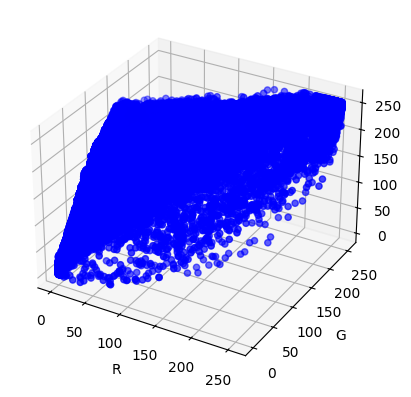

Covariance matrix:
 [[1.00001987 0.88101847 0.7310081 ]
 [0.88101847 1.00001987 0.95686113]
 [0.7310081  0.95686113 1.00001987]]
Eigenvalues:
 [2.71595037 0.27560808 0.00850117]
Eigenvalues in ratio:
 [0.9052988  0.09186753 0.00283367]
Eigenvectors:
 [[ 0.55413777  0.60395838  0.57285741]
 [ 0.77431084 -0.1213603  -0.6210591 ]
 [-0.3055717   0.787722   -0.53490184]]


In [ ]:
# Notes

image = io.imread('/content/drive/MyDrive/SAT/assets/satellite.jpg')
print(image.shape)

# 1- Convert the image to a 2D array of pixel values
img_2d = image.reshape(-1, image.shape[2])
print(img_2d.shape)

# 2- Plotting image pixels as 3-dim vectors in a 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img_2d[:,0], img_2d[:,1], img_2d[:,2], c='blue')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.title('Image Pixels as Points')
plt.show()

# The StandardScaler() function is a preprocessing step that is commonly used before performing PCA or other machine learning algorithms.
# This function scales the data to have zero mean and unit variance along each feature axis.

img_2d = StandardScaler().fit_transform(img_2d)


# Perform PCA with 3 components and fit the image data that has been scaled
pca = PCA(n_components=3)
pca.fit(img_2d)
output = pca.transform(img_2d)


# Important attributes
print('Covariance matrix:\n', pca.get_covariance())
print('Eigenvalues:\n', pca.explained_variance_)
print('Eigenvalues in ratio:\n', pca.explained_variance_ratio_)
print('Eigenvectors:\n', pca.components_)

What can you tell by looking at the covariance matrix?
Features are highly correlated, indicating redundancy in the data.

What does the eigen values represent regarding the new data?
 eigen valuesrepresent the variance captured by each principal component in the new transformed space.
 What can you tell by looking at the eigen values?
The first component captures most variance (90.36%), the second contributes 9.33%, and the third is negligible (0.31%).

(64, 64, 3)
(4096, 3)


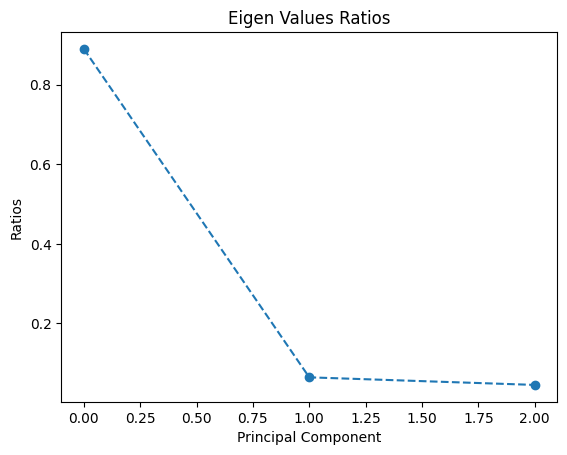

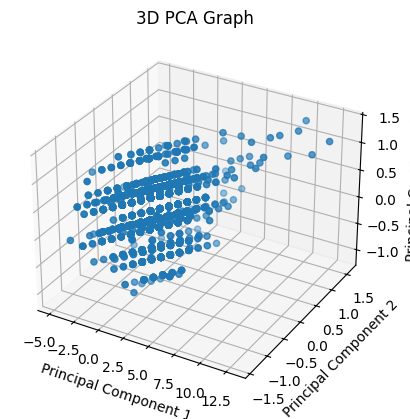

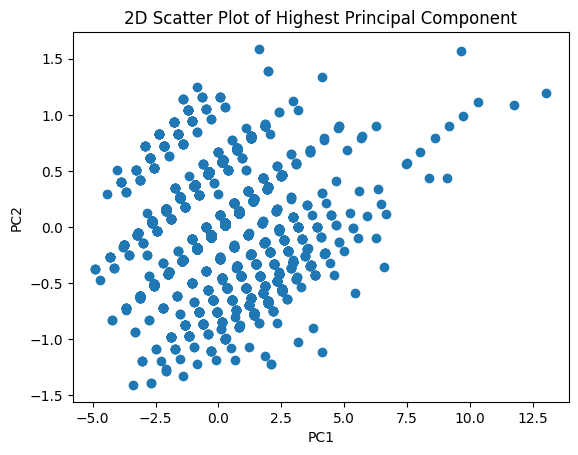

-------3 PC--------

Covariance Matrix
[[1.0002442  0.8636258  0.82428732]
 [0.8636258  1.0002442  0.8176574 ]
 [0.82428732 0.8176574  1.0002442 ]]

Eigenvalues:
[2.67079057 0.19358658 0.13635545]

Eigenvectors:
[[ 0.58139025  0.57989717  0.57070539]
 [-0.35500143 -0.4503447   0.81924578]
 [ 0.73209245 -0.67890274 -0.0559617 ]]

-------2 PC--------

Covariance Matrix
[[2.67079057e+00 4.94950709e-16]
 [4.94950709e-16 1.93586583e-01]]

Eigenvalues:
[2.67079057 0.19358658]

Eigenvectors:
[[ 1.00000000e+00 -1.99802161e-16]
 [ 0.00000000e+00  1.00000000e+00]]


In [ ]:
# Requirement 1

# TODO: Load the JPG image "Forest_1.jpg"
image = io.imread('/content/drive/MyDrive/SAT/assets/Forest_1.jpg')
print(image.shape)
# TODO: Convert the image to a 2D array of pixel values
img_2d = image.reshape(-1, image.shape[2])
print(img_2d.shape)
# TODO: Scale the data to have zero mean and unit variance along each feature axis.
img_2d = StandardScaler().fit_transform(img_2d)
# TODO: Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(img_2d)
output = pca.transform(img_2d)
# TODO: Scree plot of the eigen values ratios
explained_variance_ratio= pca.explained_variance_ratio_
plt.figure()
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Ratios')
plt.title('Eigen Values Ratios')
plt.show()
# TODO: Plot the 3D graph of the PCA
pc1 = output[:, 0]
pc2 = output[:, 1]
pc3 = output[:, 2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc1, pc2, pc3)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Graph')
plt.show()
# TODO: Remove the lowest unimportant PC
new_pca = output[:, 0:2]
# TODO: Plot the 2D points of the highest PC using plot.scatter
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(new_pca[:, 0], new_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2D Scatter Plot of Highest Principal Component')
plt.show()
# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
print('-------3 PC--------')
cov_matrix_3 = pca.get_covariance()
print("\nCovariance Matrix")
print(cov_matrix_3)
eigenvalues = pca.explained_variance_
print("\nEigenvalues:")
print(eigenvalues)
eigenvectors = pca.components_
print("\nEigenvectors:")
print(eigenvectors)
print('\n-------2 PC--------')
cov_matrix_2 = np.cov(new_pca,rowvar=False)
print("\nCovariance Matrix")
print(cov_matrix_2)
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix_2)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


## comments
- from the coveriance matrix we can see that the features are correlated, indicating redundancy in the data.(hence the data can be compressed without losing much information)

- eigen values represent the variance captured by each principal component in the new transformed space.
- eigen values are sorted from bigger to smaller (hence the first eginvalue conatain the highest variance)
- we can see in the plot of the pcas that  the data is most diverse in pc1
-  Each eigenvector defines a principal component, which is a new axis in the transformed feature space.
- the covariance matrix after transformation is almost a diagonal matrix where all off diagonal matrix are almost zero (no correlation between the new bands)
- the covariance is symmetric after and before the transformation
- the eigen vectors are orthogonal (because they form a rotation matrix)
- the sum of digonal of coveriance matrix equals sum of eigen values.

(64, 64, 13)


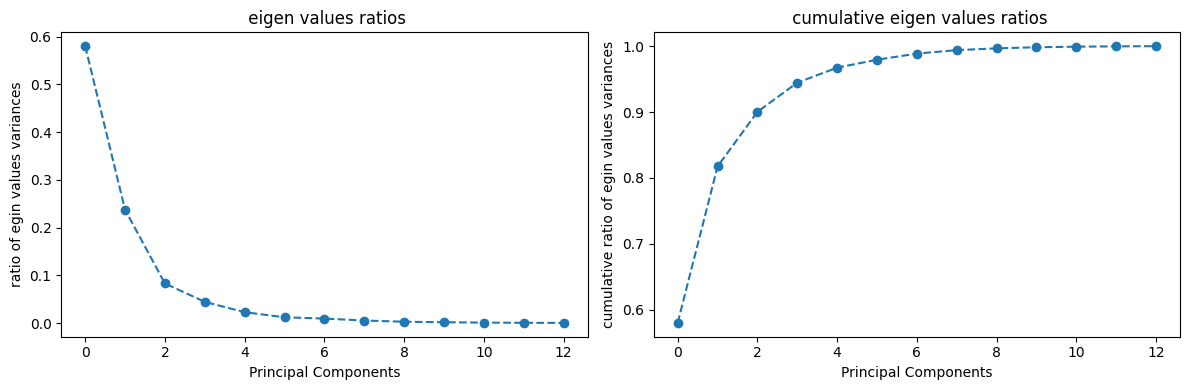

Number of pcs needed to achieve 90% variance: 3
Exact variance captured  90.0305%


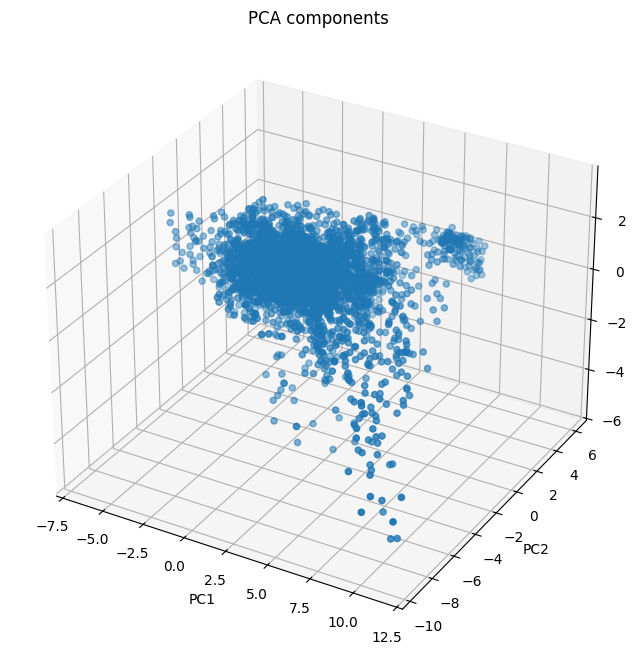

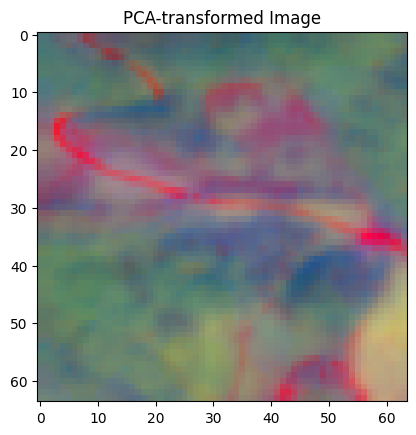

Covariance matrix:
 [[0.93840121 0.63091511 0.65598255 0.64691093 0.78957246 0.36010965
  0.27210328 0.2366361  0.45529603 0.57970124 0.79686535 0.80889365
  0.34285192]
 [0.63091511 1.00540726 0.850764   0.8812876  0.78823154 0.26838506
  0.17154226 0.20821166 0.28498211 0.1252201  0.76116362 0.82041565
  0.23395357]
 [0.65598255 0.850764   1.0151976  0.83001227 0.84703589 0.4877118
  0.39888659 0.41014119 0.47142666 0.14447658 0.82866109 0.82676197
  0.45696829]
 [0.64691093 0.8812876  0.83001227 1.03099659 0.77289582 0.16990416
  0.06800772 0.11143022 0.21120519 0.16141062 0.74418009 0.83129769
  0.13459711]
 [0.78957246 0.78823154 0.84703589 0.77289582 1.03269667 0.55453844
  0.46349868 0.44077385 0.57864883 0.38203737 0.90017344 0.87807263
  0.53007561]
 [0.36010965 0.26838506 0.4877118  0.16990416 0.55453844 1.0838156
  0.944591   0.86205303 0.83519825 0.12793459 0.57674918 0.36655969
  0.95404057]
 [0.27210328 0.17154226 0.39888659 0.06800772 0.46349868 0.944591
  1.07732051 0.8

In [10]:
# Requirement 2

# TODO: Load the TIF image "Forest_27.tif"
image = io.imread('/content/drive/MyDrive/SAT/assets/Forest_27.tif')
print(image.shape)


# TODO: Convert the image to a 2D array of pixel values
img_2d = image.reshape(-1, image.shape[2])

# TODO: Scale the data to have zero mean and unit variance along each feature axis.
img_2d = StandardScaler().fit_transform(img_2d)
# TODO: Perform PCA with 3 components
pca_full = PCA()
pca_full.fit(img_2d)
output=pca_full.transform(img_2d)

# TODO: Scree plot of the eigen values ratios
plt.figure(figsize=(12, 4))

# Scree plot of the eigen values ratios
plt.subplot(1, 2, 1)
plt.plot(  pca_full.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('ratio of egin values variances')
plt.title(' eigen values ratios')
plt.subplot(1, 2, 2)

plt.plot(  np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('cumulative ratio of egin values variances')
plt.title(' cumulative eigen values ratios')

plt.tight_layout()
plt.show()
# TODO: How many PCs required to achieve 90% variance ? and print the exact percentage of these PCs

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_pcs = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of pcs needed to achieve 90% variance: {num_pcs}")
print(f"Exact variance captured  {cumulative_variance[num_pcs - 1] * 100:.4f}%")
##3 Pcs were needed
##extact precentage =0.9003052

# TODO: Keep the PCs that will achieve 90%
output_final = output[:,:num_pcs]


# TODO: Plot the graph of the PCA (that achieve 90%)

fig=plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(output_final[:, 0], output_final[:, 1], output_final[:, 2])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA components")
plt.show()
##we can see in the plot the data is most diverse in pc1


##plot the image

##zero orgin shift
output_final = output_final.reshape(image.shape[0],image.shape[1], 3)
output_final_shifted = (output_final - np.min(output_final)) / (np.max(output_final) - np.min(output_final))
plt.title("PCA-transformed Image")

plt.imshow(output_final_shifted)
plt.show()
# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
print('Covariance matrix:\n', pca_final.get_covariance())
print('Eigenvalues:\n', pca_final.explained_variance_)
print('Eigenvectors:\n', pca_final.components_)

##coveriance matrix of transformed image
# print('Covariance matrix of the final output:\n', np.cov(output_final.T))


(64, 64, 13)


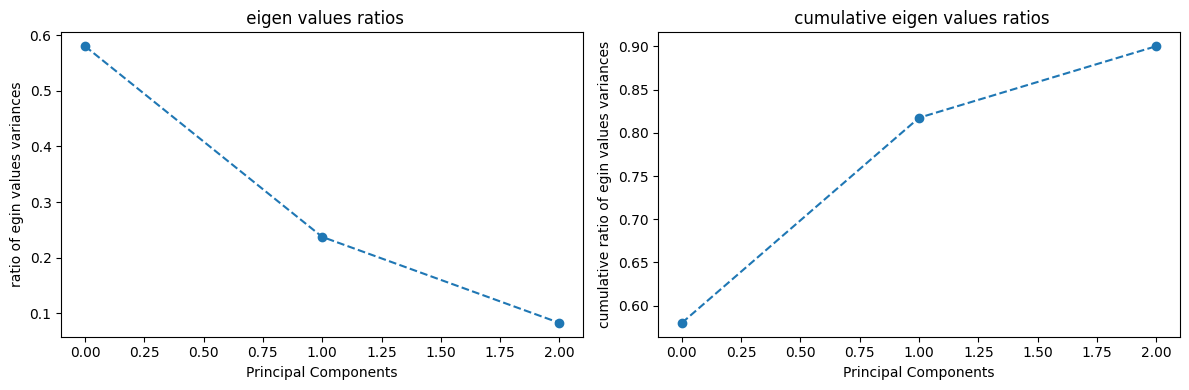

Number of pcs needed to achieve 90% variance: 3
Exact variance captured  90.0305%


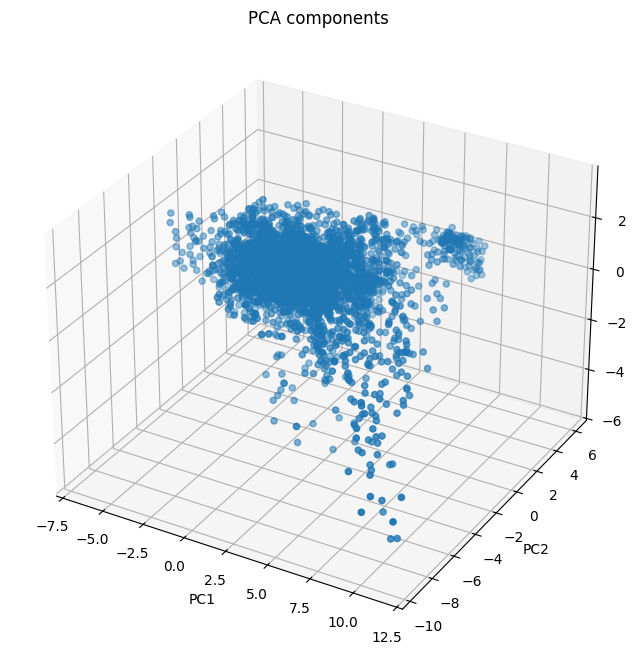

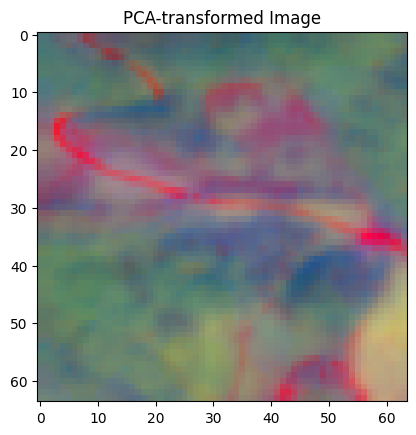


-------before PC--------

Covariance Matrix
[[0.93840121 0.63091511 0.65598255 0.64691093 0.78957246 0.36010965
  0.27210328 0.2366361  0.45529603 0.57970124 0.79686535 0.80889365
  0.34285192]
 [0.63091511 1.00540726 0.850764   0.8812876  0.78823154 0.26838506
  0.17154226 0.20821166 0.28498211 0.1252201  0.76116362 0.82041565
  0.23395357]
 [0.65598255 0.850764   1.0151976  0.83001227 0.84703589 0.4877118
  0.39888659 0.41014119 0.47142666 0.14447658 0.82866109 0.82676197
  0.45696829]
 [0.64691093 0.8812876  0.83001227 1.03099659 0.77289582 0.16990416
  0.06800772 0.11143022 0.21120519 0.16141062 0.74418009 0.83129769
  0.13459711]
 [0.78957246 0.78823154 0.84703589 0.77289582 1.03269667 0.55453844
  0.46349868 0.44077385 0.57864883 0.38203737 0.90017344 0.87807263
  0.53007561]
 [0.36010965 0.26838506 0.4877118  0.16990416 0.55453844 1.0838156
  0.944591   0.86205303 0.83519825 0.12793459 0.57674918 0.36655969
  0.95404057]
 [0.27210328 0.17154226 0.39888659 0.06800772 0.46349868 

In [13]:
# Requirement 2

# TODO: Load the TIF image "Forest_27.tif"
image = io.imread('/content/drive/MyDrive/SAT/assets/Forest_27.tif')
print(image.shape)


# TODO: Convert the image to a 2D array of pixel values
img_2d = image.reshape(-1, image.shape[2])

# TODO: Scale the data to have zero mean and unit variance along each feature axis.
img_2d = StandardScaler().fit_transform(img_2d)
# TODO: Perform PCA with 3 components

pca_3_components = PCA(n_components=3)
pca_3_components.fit(img_2d)
output=pca_3_components.transform(img_2d)
# TODO: Scree plot of the eigen values ratios
plt.figure(figsize=(12, 4))

# Scree plot of the eigen values ratios
plt.subplot(1, 2, 1)
plt.plot(  pca_3_components.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('ratio of egin values variances')
plt.title(' eigen values ratios')
plt.subplot(1, 2, 2)

plt.plot(  np.cumsum(pca_3_components.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('cumulative ratio of egin values variances')
plt.title(' cumulative eigen values ratios')

plt.tight_layout()
plt.show()
# TODO: How many PCs required to achieve 90% variance ? and print the exact percentage of these PCs

cumulative_variance = np.cumsum(pca_3_components.explained_variance_ratio_)
num_pcs = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of pcs needed to achieve 90% variance: {num_pcs}")
print(f"Exact variance captured  {cumulative_variance[num_pcs - 1] * 100:.4f}%")
##3 Pcs were needed
##extact precentage =0.9003052

# TODO: Keep the PCs that will achieve 90%
output_final = output[:,:num_pcs]

# TODO: Plot the graph of the PCA (that achieve 90%)

fig=plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(output_final[:, 0], output_final[:, 1], output_final[:, 2])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA components")
plt.show()
##we can see in the plot the data is most diverse in pc1


##plot the image

##zero orgin shift
output_final1 = output_final.reshape(image.shape[0],image.shape[1], 3)
output_final_shifted = (output_final1 - np.min(output_final)) / (np.max(output_final) - np.min(output_final))
plt.title("PCA-transformed Image")

plt.imshow(output_final_shifted)
plt.show()
# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
cov_matrix_3 = pca_3_components.get_covariance()
print('\n-------before PC--------')

print("\nCovariance Matrix")
print(cov_matrix_3)
eigenvalues = pca_3_components.explained_variance_
print("\nEigenvalues:")
print(eigenvalues)
eigenvectors = pca_3_components.components_
print("\nEigenvectors:")
print(eigenvectors)
print('\n-------after PC--------')
cov_matrix_2 = np.cov(output_final,rowvar=False)
print("\nCovariance Matrix")
print(cov_matrix_2)
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix_2)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


## comments
- from the coveriance matrix we can see that the features are correlated, indicating redundancy in the data.(hence the data can be compressed without losing much information)

- eigen values represent the variance captured by each principal component in the new transformed space.
- eigen values are sorted from bigger to smaller (hence the first eginvalue conatain the highest variance)
- we can see in the plot of the pcas that  the data is most diverse in pc1
-  Each eigenvector defines a principal component, which is a new axis in the transformed feature space.
- the covariance matrix after transformation is almost a diagonal matrix where all off diagonal matrix are almost zero (no correlation between the new bands)
- the covariance is symmetric after and before the transformation
- the eigen vectors are orthogonal (because they form a rotation matrix)

# Grading
## Req 1 is graded on these outputs dont forget to add them all:
- 3 plots (Scree plot of the eigen values ratios, 3D plot of the PC, 2D plot of the reduced dimensionality PC)
- Printing cov matrix, eigenvalues, and eigenvectors and add Comments on the answer

## Req 2 is graded on these outputs dont forget to add them all:
- 2 plots (Scree plot of the eigen values ratios, plot of the reduced dimensionality PC)
- Printing cov matrix, eigenvalues, and eigenvectors and add Comments on the answer